<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-основных-библиотек" data-toc-modified-id="Загрузка-данных-и-основных-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и основных библиотек</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Предварительная-обработка-данных" data-toc-modified-id="Предварительная-обработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предварительная обработка данных</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-результаты" data-toc-modified-id="Промежуточные-результаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Промежуточные результаты</a></span></li></ul></li><li><span><a href="#Разведовательный-анализ-данных" data-toc-modified-id="Разведовательный-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разведовательный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-результат" data-toc-modified-id="Промежуточный-результат-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Промежуточный результат</a></span></li></ul></li><li><span><a href="#Разработка-новых-синтетических-признаков" data-toc-modified-id="Разработка-новых-синтетических-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разработка новых синтетических признаков</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Отбор-обучающих-признаков" data-toc-modified-id="Отбор-обучающих-признаков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отбор обучающих признаков</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-результат" data-toc-modified-id="Промежуточный-результат-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Промежуточный результат</a></span></li></ul></li><li><span><a href="#Интерпритация-модели" data-toc-modified-id="Интерпритация-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Интерпритация модели</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Загрузка данных и основных библиотек

Первым делом загрузим таблицы с данными и основные библиотеки

In [1]:
!pip install shap -q
!pip install phik -q


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import phik

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler)
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score


import shap

RANDOM_STATE = 42

In [3]:
train_data = pd.read_csv('C:/Users/User/Desktop/Яндекс/Проект мастерская/kaggle_startups_train_28062024.csv')
test_data = pd.read_csv('C:/Users/User/Desktop/Яндекс/Проект мастерская/kaggle_startups_test_28062024.csv')

Взглянем на наши наборы данных, посмотрим все ли данные есть и как они представлены 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [5]:
train_data.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


In [6]:
train_data.describe()

,funding_total_usd,funding_rounds
count,4.244700e+04,52516.000000
mean,1.824748e+07,1.740670
std,1.871173e+08,1.374522
min,1.000000e+00,1.000000
25%,3.360275e+05,1.000000
50%,2.000000e+06,1.000000
75%,1.000000e+07,2.000000
max,3.007950e+10,19.000000


Можно заметить в тренировочных данных все соответствует ТЗ и присутствует все данные. Также можно заметить небольшую старнную аномалию, минимальное финансирование соответсвует 1 usd, что выглядит не совсем правдопадобно. 

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [8]:
test_data.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [9]:
test_data.describe()

,funding_total_usd,funding_rounds,lifetime
count,1.054700e+04,13125.000000,13125.000000
mean,1.654910e+07,1.714438,3097.609524
std,9.217283e+07,1.318800,2128.356554
min,1.000000e+00,1.000000,52.000000
25%,3.200000e+05,1.000000,1726.000000
50%,2.000000e+06,1.000000,2526.000000
75%,1.000000e+07,2.000000,3866.000000
max,4.715000e+09,15.000000,17167.000000


В тестовой выборке немного другие данные - нет даты основания стартапа и есть дополнительный столбец с временем существования стартапа. Аномалия с финансированием в 1 usd также и здесь есть, наверное такое возможно.

Изучим данные на предмет пропусков и дубликатов.

In [10]:
train_data.isna().sum()

name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

In [11]:
train_data.duplicated().sum()

0

In [12]:
test_data.isna().sum()

name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

In [13]:
test_data.duplicated().sum()

0

В данных абсолютно нет явных дубликатов, но есть некоторые количество пропусков.
Пропуски в closed_at связаны с тем, что многие компании не закрыты и поэтому там много пропусков.
Пропуски в геоданных скорее всего связаны либо с отсутствием либо штатов или регионов, либо компания не дислацируется в каком-то конкретном месте.

### Промежуточные выводы

* Загружены основные библиотеки
* Загружены таблицы с данными и проведено первичное с ними знакомство

## Предварительная обработка данных

Данные с временем необходимо привести к нужному типу данных

In [14]:
for one in ['founded_at','first_funding_at','last_funding_at']:
    train_data[one] = pd.to_datetime(train_data[one])
    
for another_one in ['first_funding_at','last_funding_at']:
    test_data[another_one] = pd.to_datetime(test_data[another_one])

В наших данных много категориальных признаков, заполнить пропуски в этих данных не представляется возможности. Но можно заполнить часть пропусков в финансировании. Пропуски будем заполнять медианным значением финансирования для различных стран.

In [15]:
country_list = train_data['country_code'].unique()

for country in country_list:
    median_fund = train_data[train_data['country_code'] == country]['funding_total_usd'].median()
    if median_fund > 0:
        train_data.loc[train_data['country_code'] == country, 'funding_total_usd'] = (
            train_data.loc[train_data['country_code'] == country, 'funding_total_usd'].fillna(median_fund))
    else:
        train_data.loc[train_data['country_code'] == country, 'funding_total_usd'] = (
            train_data.loc[train_data['country_code'] == country, 'funding_total_usd'].fillna(train_data['funding_total_usd'].median()))
    

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: R

In [16]:
country_list = test_data['country_code'].unique()

for country in country_list:
    median_fund = test_data[test_data['country_code'] == country]['funding_total_usd'].median()
    if median_fund > 0:
        test_data.loc[test_data['country_code'] == country, 'funding_total_usd'] = (
            test_data.loc[test_data['country_code'] == country, 'funding_total_usd'].fillna(median_fund))
    else:
        test_data.loc[test_data['country_code'] == country, 'funding_total_usd'] = (
            test_data.loc[test_data['country_code'] == country, 'funding_total_usd'].fillna(test_data['funding_total_usd'].median()))
    

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [17]:
train_data.isna().sum()

name                     1
category_list         2465
funding_total_usd     1826
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

In [18]:
test_data.isna().sum()

name                    0
category_list         591
funding_total_usd     490
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

Видно, что часть пропусков мы заполнили.

### Промежуточные результаты

* Временные данные приведены к нужному типу
* Обработана часть пропусков в суммаром финансировании

## Разведовательный анализ данных

Изучим распределение данных

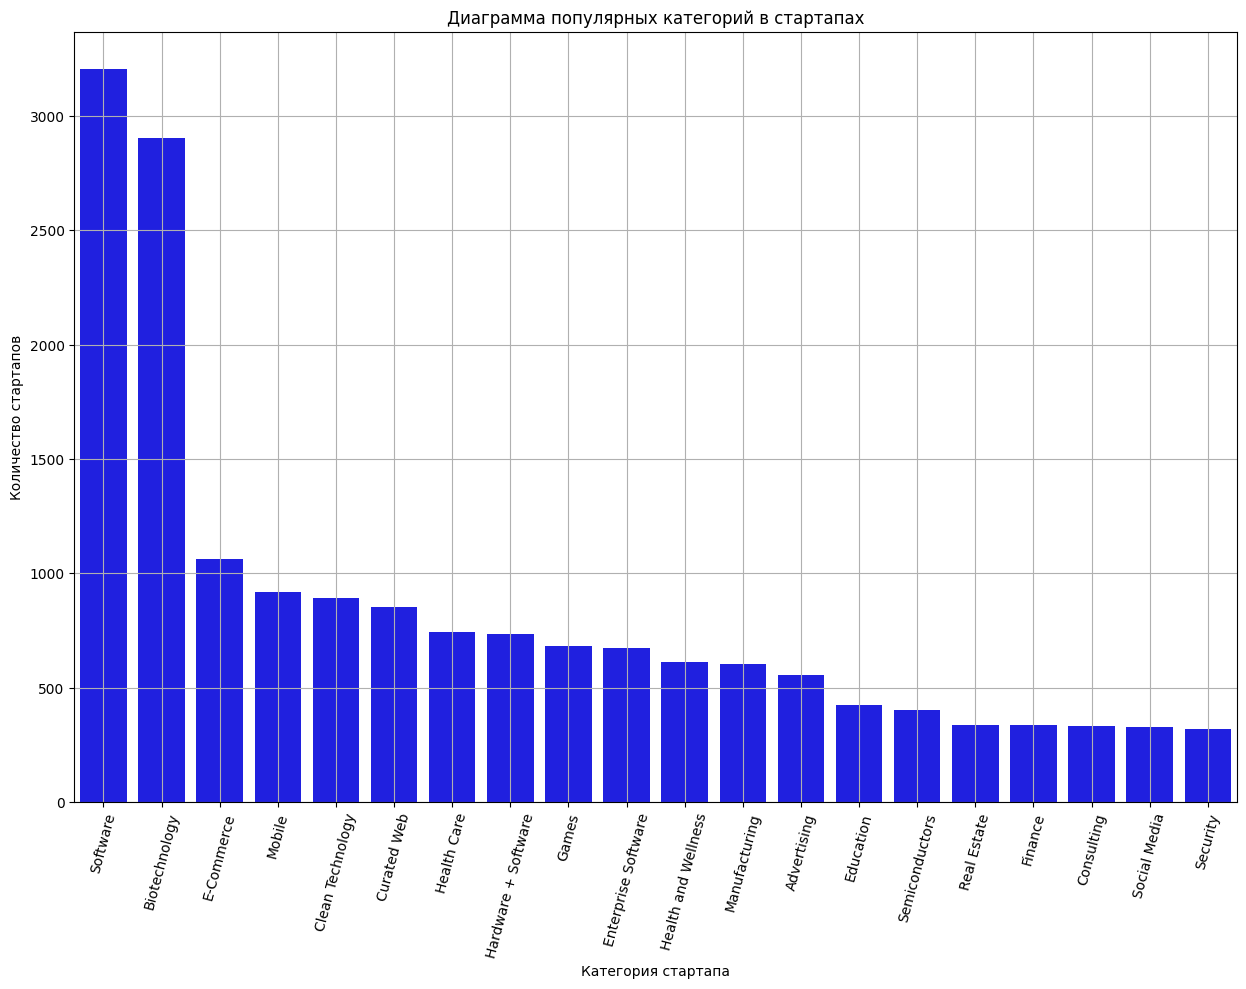

In [19]:
category_date = pd.pivot_table(train_data, index='category_list', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
sns.barplot(data = category_date, x=category_date.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Категория стартапа')
plt.title('Диаграмма популярных категорий в стартапах')
plt.grid()
plt.show()

В category_list содержится крайне много уникальных признаков, поэтому выводим наиболее популярные категории стартапов, чтобы понять какие стартапы часто открываются.

Стартапы свзяаные с IT и Биотехнолгиями чаще всего приходят на рынок.

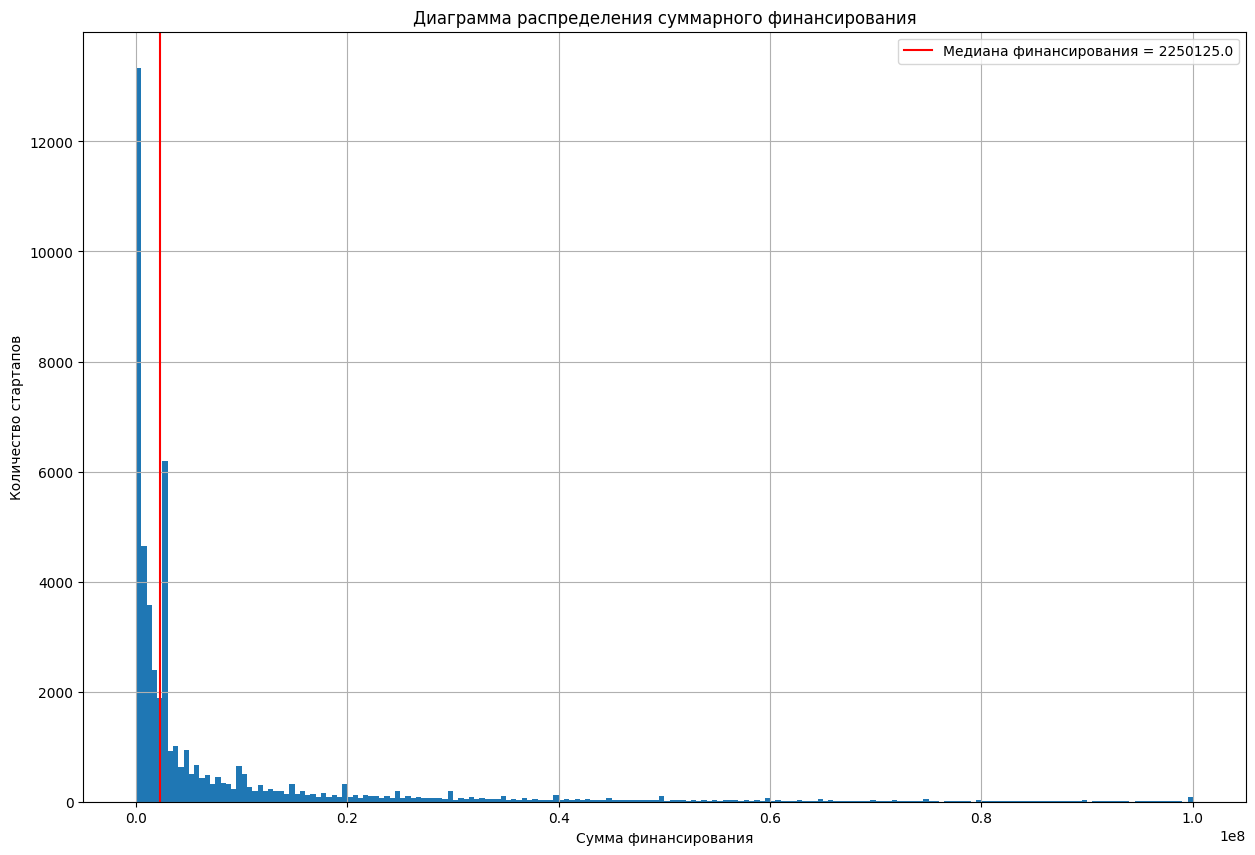

In [20]:
fund_data = train_data[train_data['funding_total_usd'] <= train_data['funding_total_usd'].quantile(0.975)]

plt.figure(figsize=(15,10))
plt.hist(fund_data['funding_total_usd'], bins=200)
plt.grid()
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество стартапов')
plt.title('Диаграмма распределения суммарного финансирования')
plt.axvline(fund_data['funding_total_usd'].median(), color='red', label=f'Медиана финансирования = {fund_data["funding_total_usd"].median()}')
plt.legend()
plt.show()

По гистограмме видно, что финансирование от компании к компании сильно различается, а также много компаний не имееют финансировния вообще.

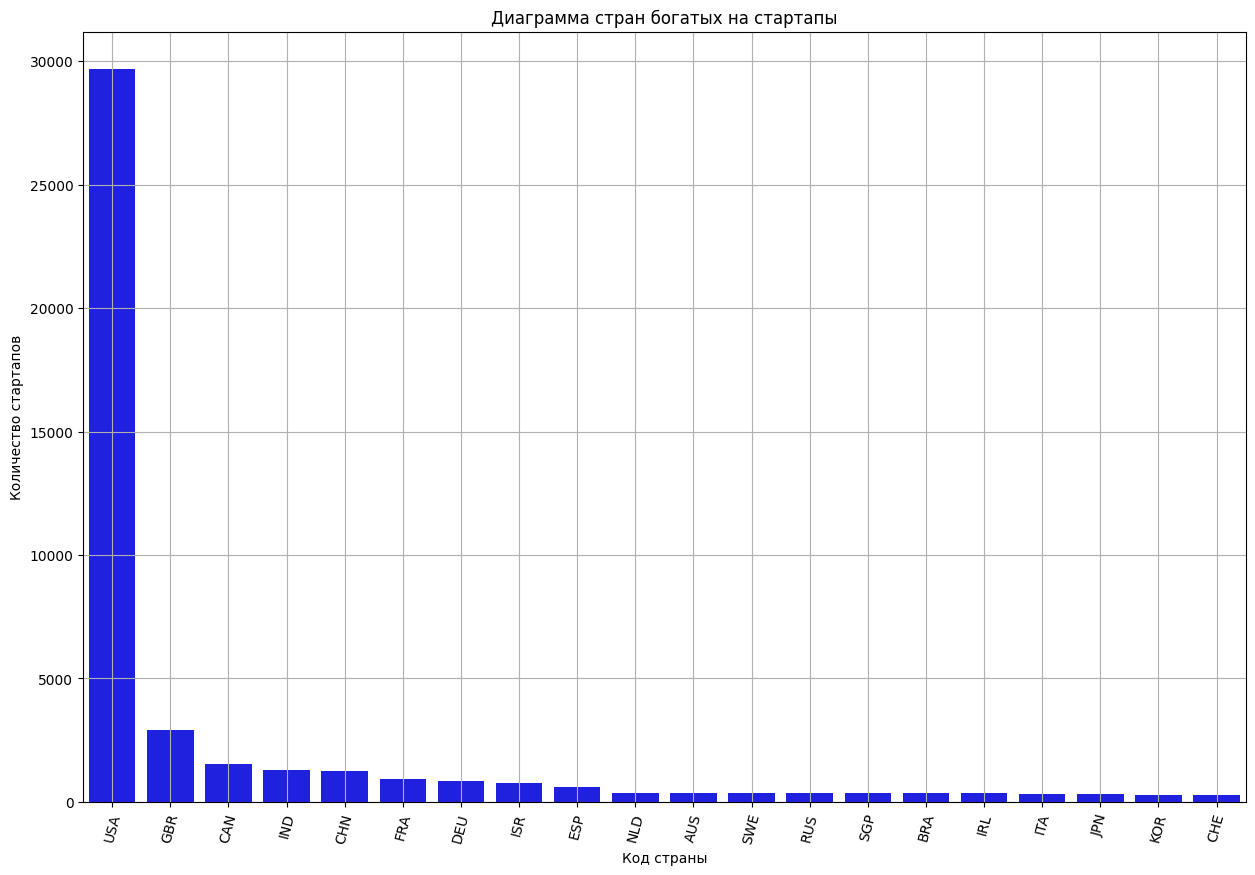

In [21]:
country_date = pd.pivot_table(train_data, index='country_code', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
sns.barplot(data = country_date, x=country_date.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Код страны')
plt.title('Диаграмма стран богатых на стартапы')
plt.grid()
plt.show()

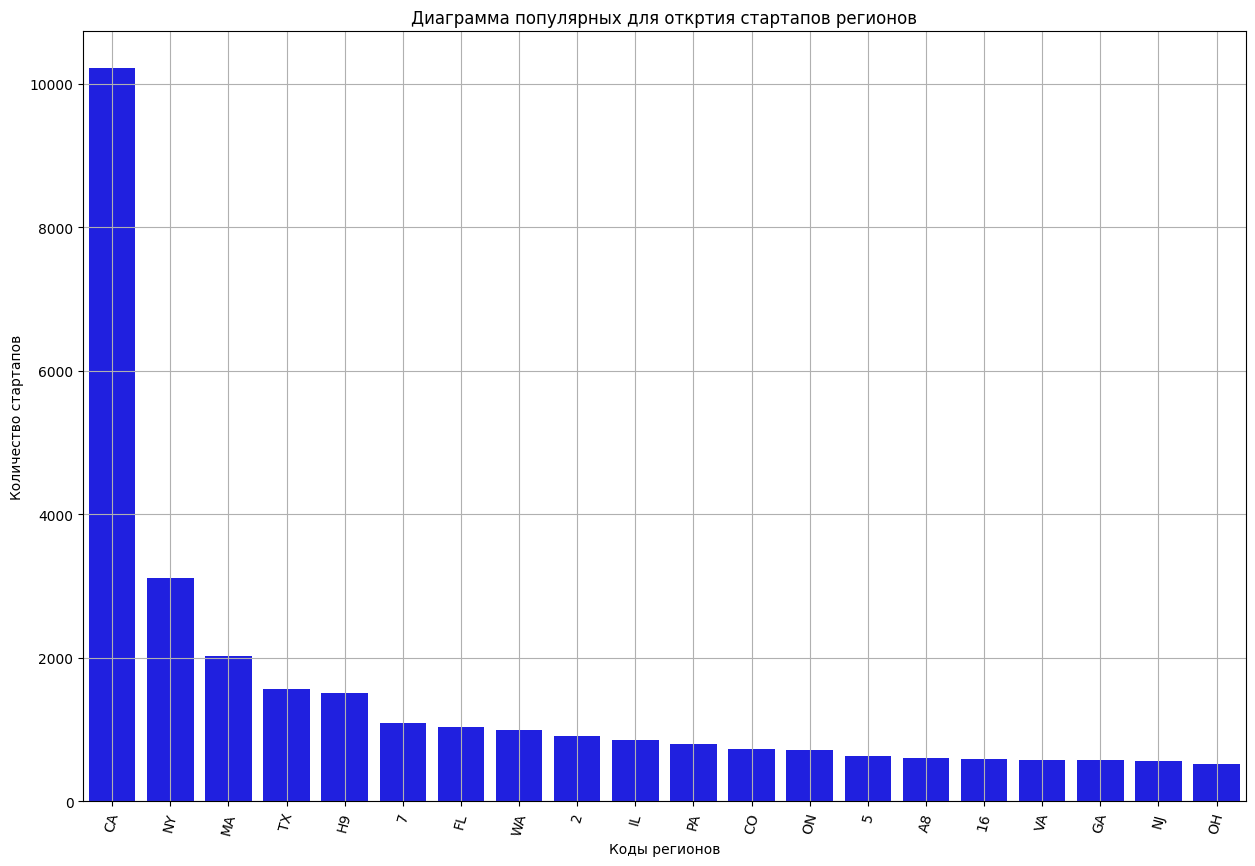

In [22]:
state_date = pd.pivot_table(train_data, index='state_code', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
sns.barplot(data = state_date, x=state_date.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Коды регионов')
plt.title('Диаграмма популярных для откртия стартапов регионов')
plt.grid()
plt.show()

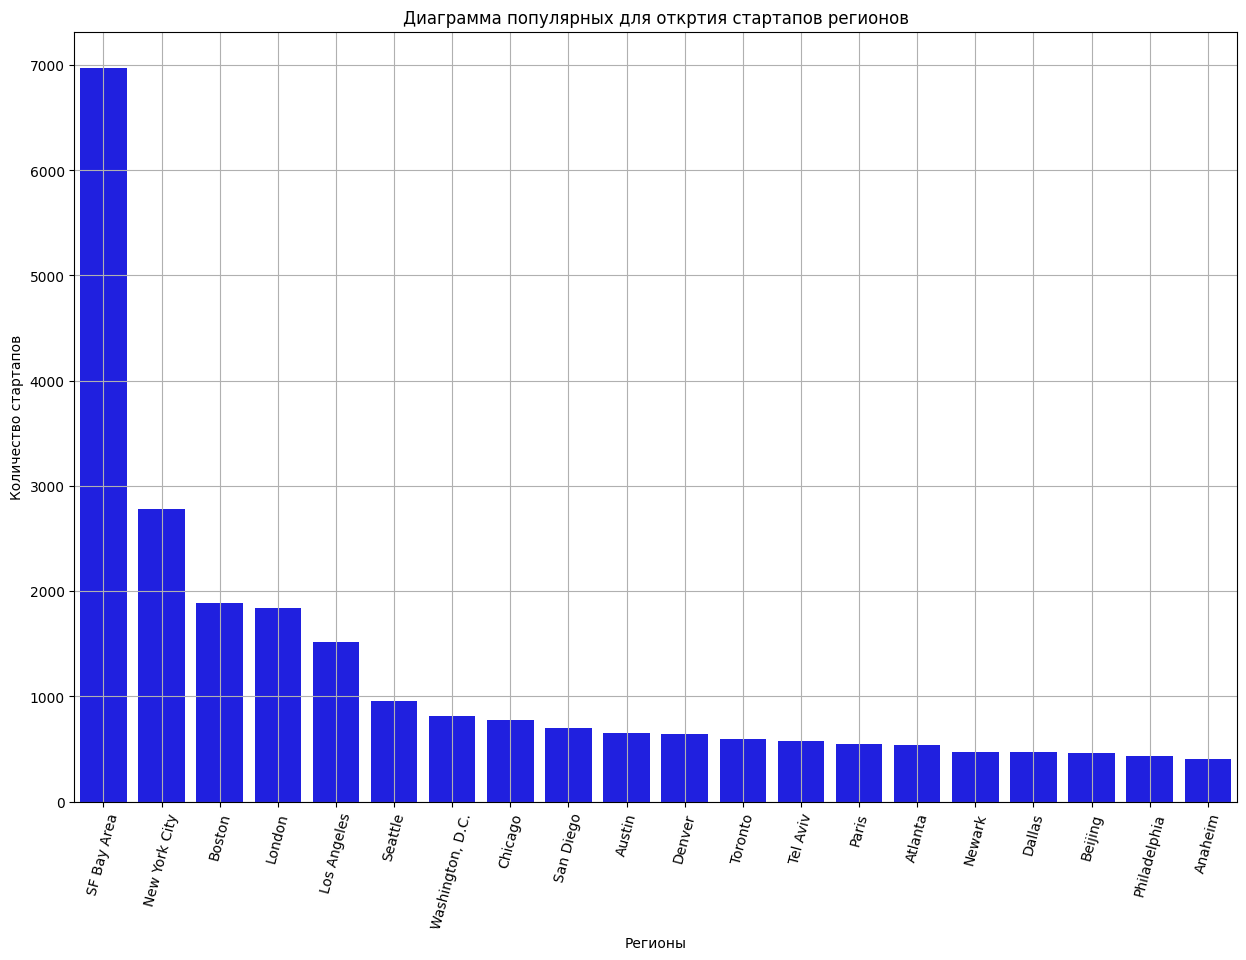

In [23]:
region_date = pd.pivot_table(train_data, index='region', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
sns.barplot(data = region_date, x=region_date.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Регионы')
plt.title('Диаграмма популярных для откртия стартапов регионов')
plt.grid()
plt.show()

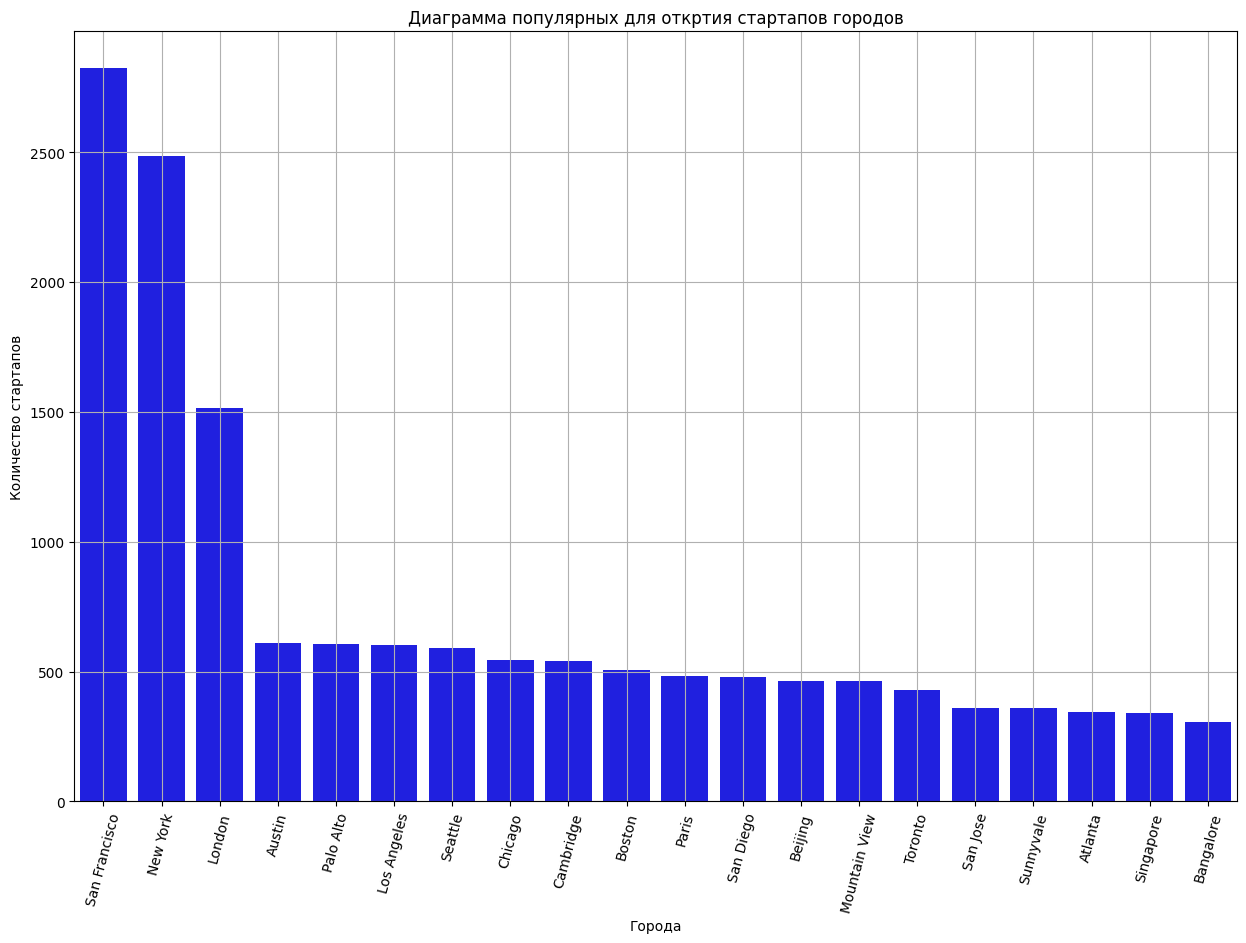

In [24]:
city_date = pd.pivot_table(train_data, index='city', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
sns.barplot(data = city_date, x=city_date.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Города')
plt.title('Диаграмма популярных для откртия стартапов городов')
plt.grid()
plt.show()

В общем по геоданным можно сделать такой вывод, что наиболее популярной территорией для открытия стартапов является США, Канада и Великобритания. На гистограмме городов в топе - города из США и лондон, на гистограмме регионов аналогичная ситуация - в топе находятся регионы из Канады, США и Великобритании.

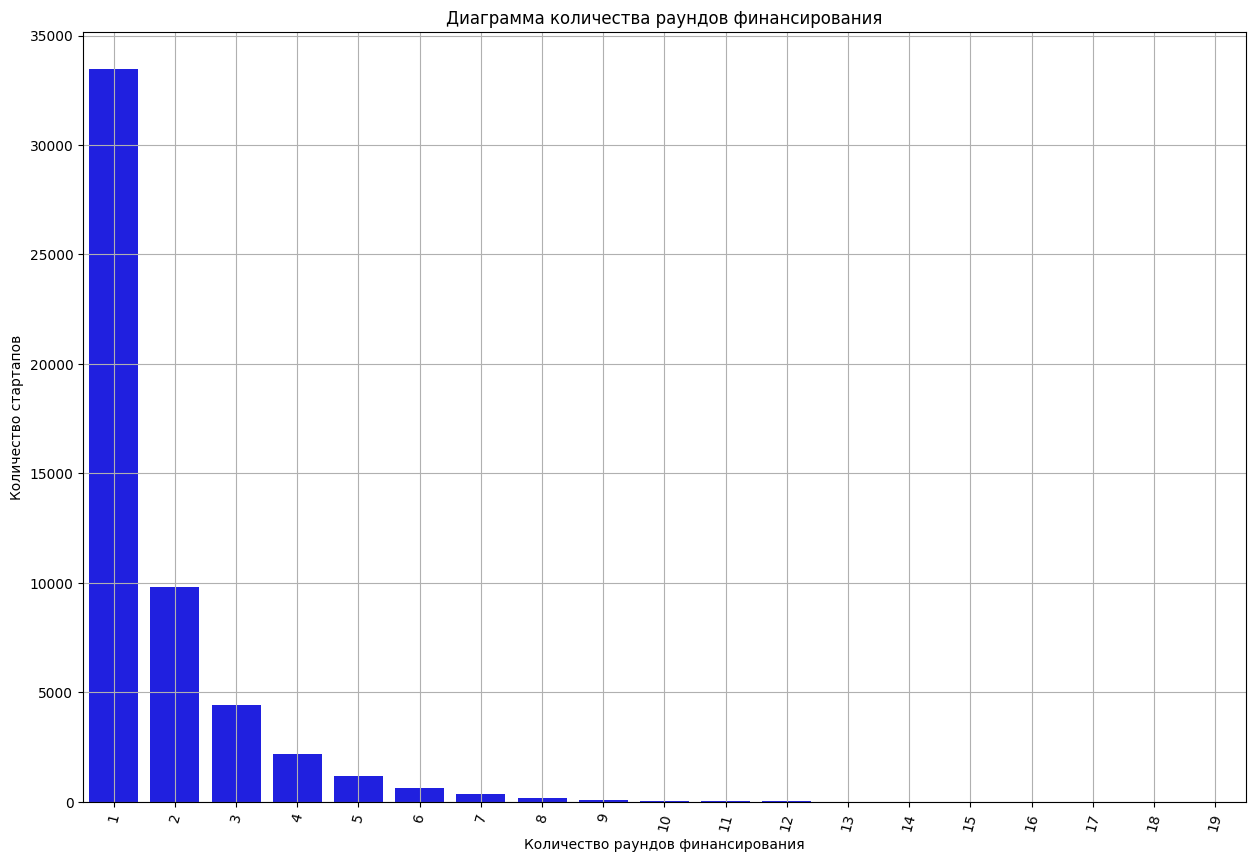

In [25]:
rounds_date = pd.pivot_table(train_data, index='funding_rounds', values='name', aggfunc='count').sort_values(by='name',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(data = rounds_date, x=rounds_date.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Количество раундов финансирования')
plt.title('Диаграмма количества раундов финансирования')
plt.grid()
plt.show()

На гистограмме видно, что большинтсво стартапов имееют всего 1 раунд финансирования.

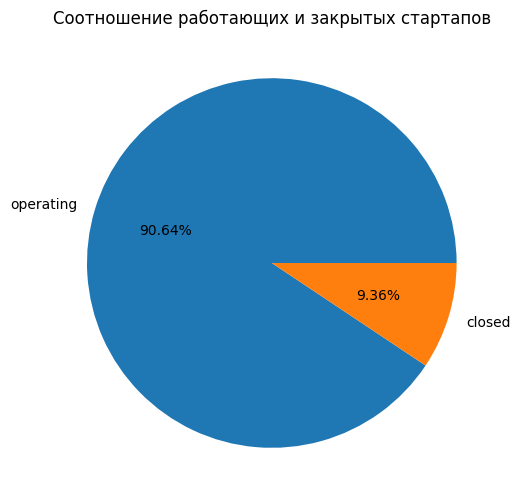

In [26]:
plt.figure(figsize=(8,6))
plt.pie(train_data['status'].value_counts(), autopct = lambda x: '%.2f' % x + '%', labels=train_data['status'].value_counts().index)
plt.title('Соотношение работающих и закрытых стартапов')
plt.show()

Соотношение очень не сбалансированное - всего 10% стартапов закрылось

Теперь рассмотрим данные в разрезе целевого признака, посмотрим как он влияет на поведение других признаков.

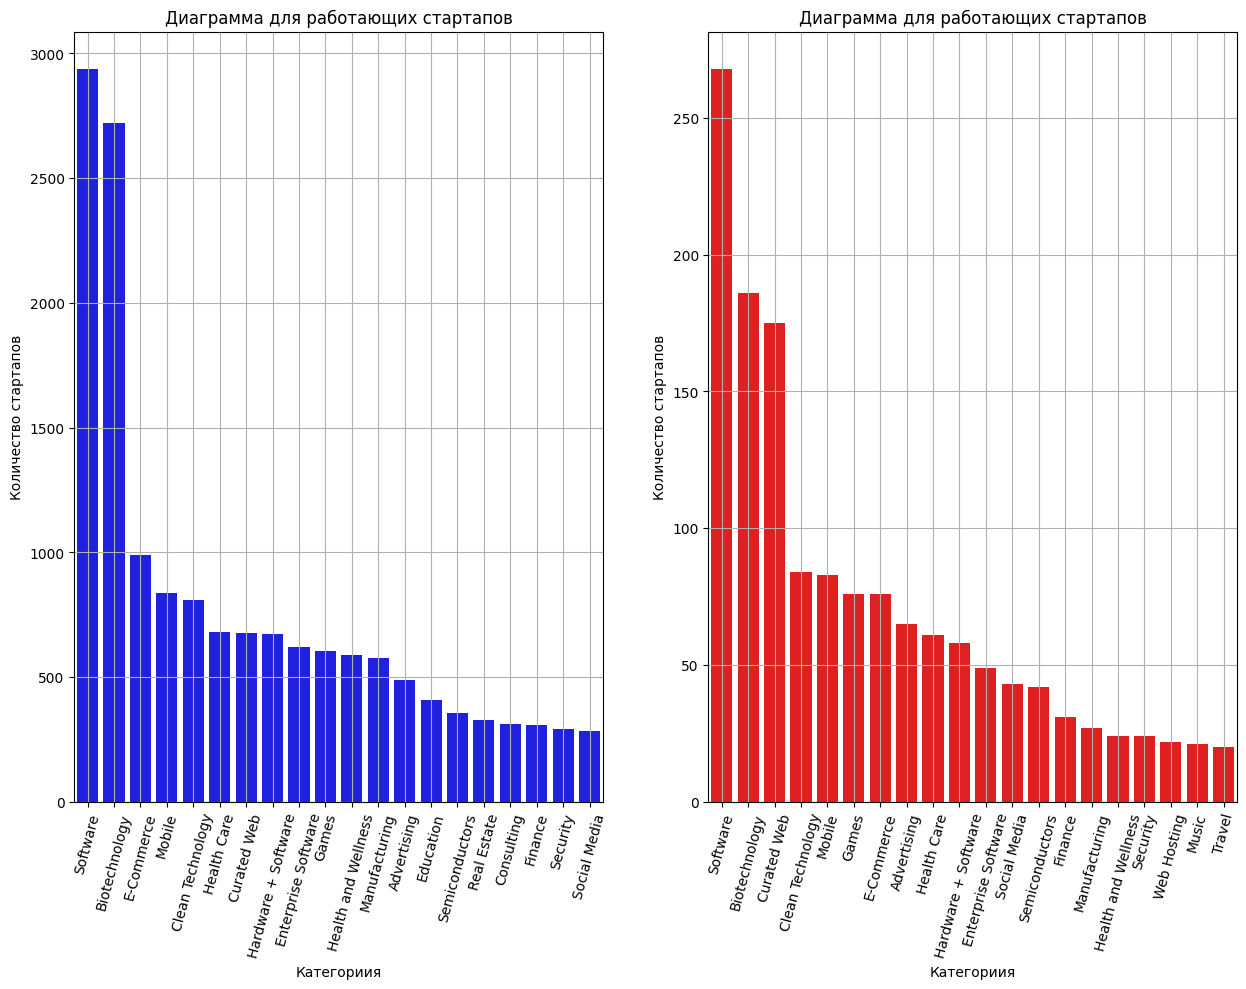

In [27]:
op_data = train_data[train_data['status'] == 'operating']
cl_data = train_data[train_data['status'] == 'closed']


category_date_op = pd.pivot_table(op_data, index='category_list', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)
category_date_cl = pd.pivot_table(cl_data, index='category_list', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.barplot(data = category_date_op, x=category_date_op.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Категориия')
plt.title('Диаграмма для работающих стартапов')
plt.grid()

plt.subplot(1, 2, 2)
sns.barplot(data = category_date_cl, x=category_date_cl.index, y = 'name', color='red')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Категориия')
plt.title('Диаграмма для работающих стартапов')
plt.grid()


В работающих и закрывшихся стартапах категории почти идентичны, за исключением небольших различий.

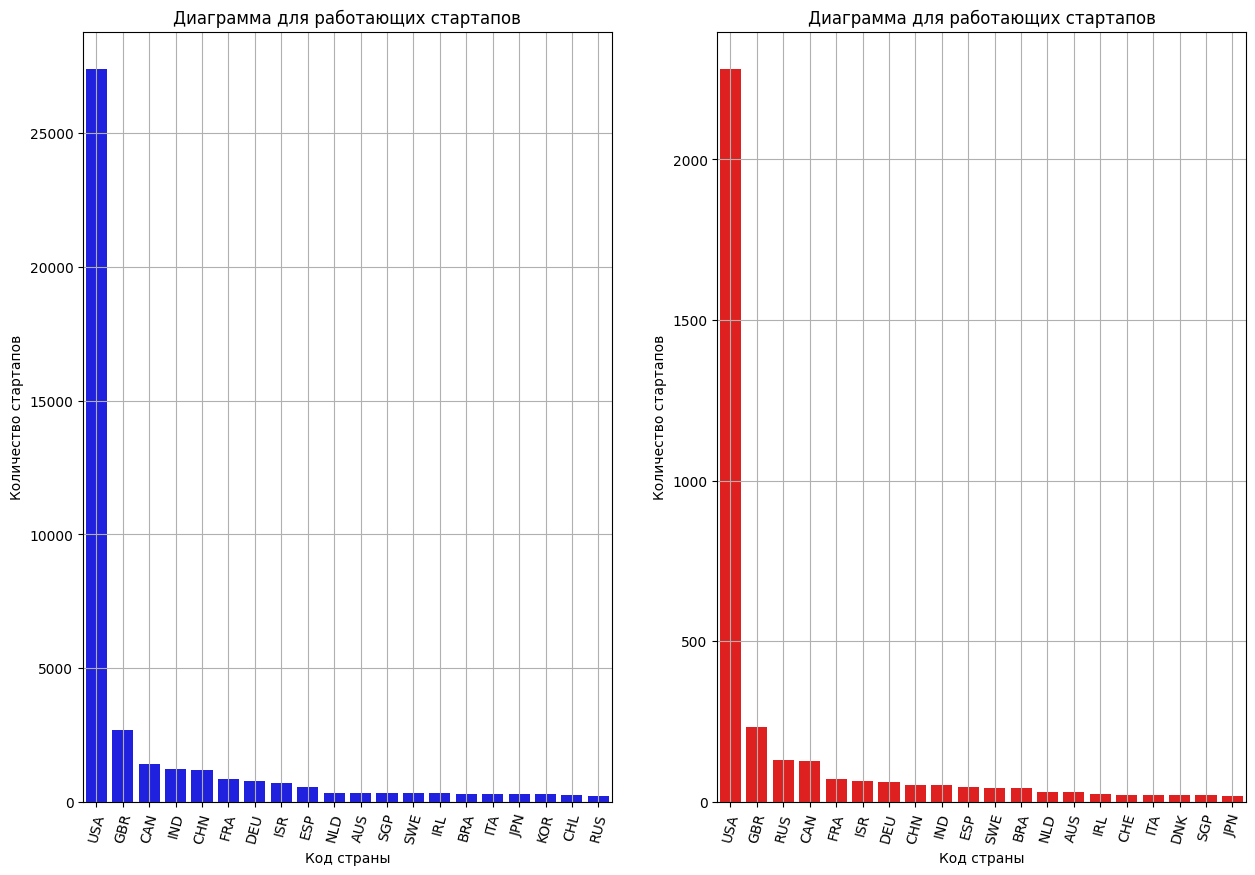

In [28]:
country_date_op = pd.pivot_table(op_data, index='country_code', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)
country_date_cl = pd.pivot_table(cl_data, index='country_code', values='name', aggfunc='count').sort_values(by='name',ascending=False).head(20)

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.barplot(data = country_date_op, x=country_date_op.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Код страны')
plt.title('Диаграмма для работающих стартапов')
plt.grid()

plt.subplot(1, 2, 2)
sns.barplot(data = country_date_cl, x=country_date_cl.index, y = 'name', color='red')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Код страны')
plt.title('Диаграмма для работающих стартапов')
plt.grid()

В старанах ситуация похожая, также США, Великобритания и Канада, но еще в закрывшихся в топ 3 вырвалась Россия.

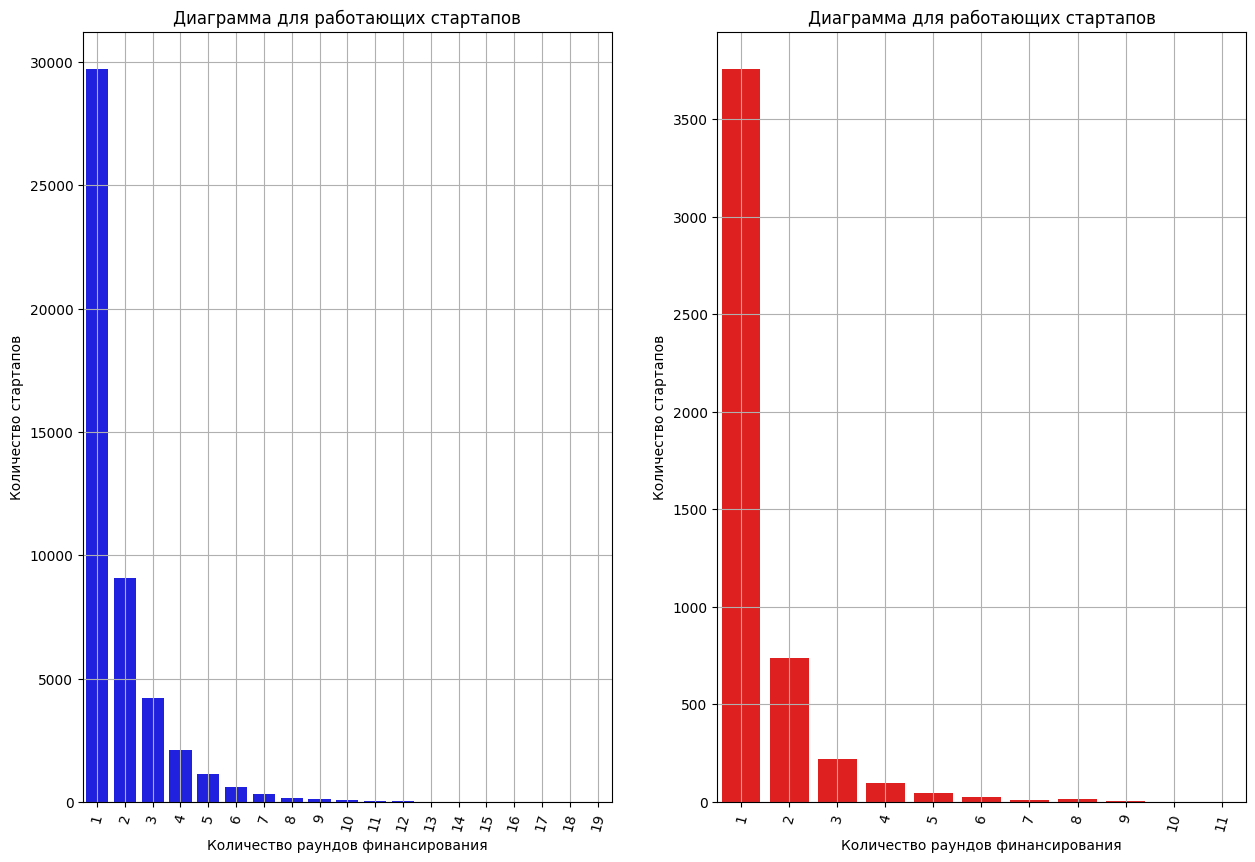

In [29]:
round_date_op = pd.pivot_table(op_data, index='funding_rounds', values='name', aggfunc='count').sort_values(by='name',ascending=False)
round_date_cl = pd.pivot_table(cl_data, index='funding_rounds', values='name', aggfunc='count').sort_values(by='name',ascending=False)

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.barplot(data = round_date_op, x=round_date_op.index, y = 'name', color='blue')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Количество раундов финансирования')
plt.title('Диаграмма для работающих стартапов')
plt.grid()

plt.subplot(1, 2, 2)
sns.barplot(data = round_date_cl, x=round_date_cl.index, y = 'name', color='red')
plt.xticks(rotation=75)
plt.ylabel('Количество стартапов')
plt.xlabel('Количество раундов финансирования')
plt.title('Диаграмма для работающих стартапов')
plt.grid()

В данном столбце можно заметить, что у работающих компаний также крайне много случаев, когда финансирование не превышает 1 раунда, но также вместе с этим видно, что у работающих компаний выше верхняя граница финансирования 19 раундов.

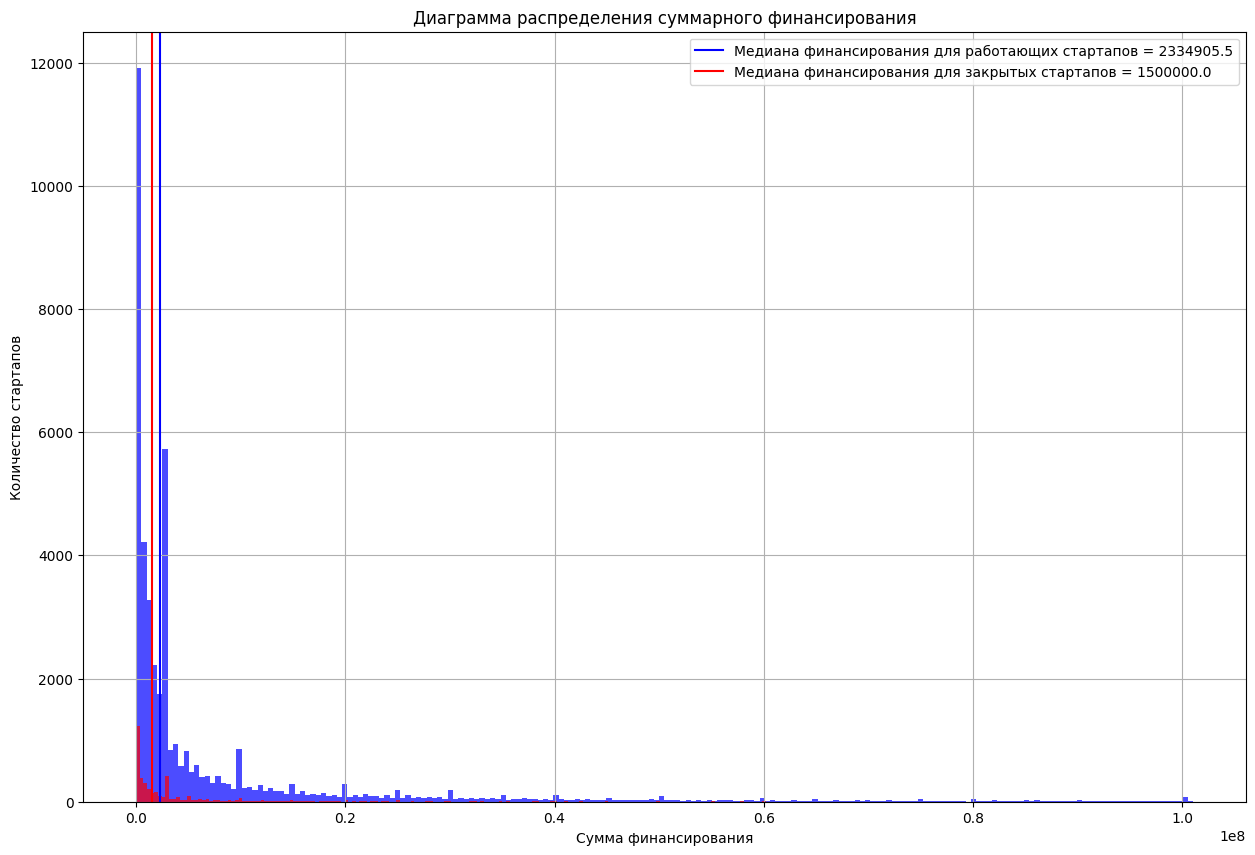

In [30]:
fund_data_op = op_data[op_data['funding_total_usd'] <= op_data['funding_total_usd'].quantile(0.975)]
fund_data_cl = cl_data[cl_data['funding_total_usd'] <= cl_data['funding_total_usd'].quantile(0.975)]

plt.figure(figsize=(15,10))
plt.hist(fund_data_op['funding_total_usd'], bins=200, color='blue', alpha=0.7)
plt.hist(fund_data_cl['funding_total_usd'], bins=200, color='red', alpha=0.7)
plt.grid()
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество стартапов')
plt.title('Диаграмма распределения суммарного финансирования')
plt.axvline(fund_data_op['funding_total_usd'].median(), color='blue',
                label=f'Медиана финансирования для работающих стартапов = {fund_data_op["funding_total_usd"].median()}')
plt.axvline(fund_data_cl['funding_total_usd'].median(), color='red',
                label=f'Медиана финансирования для закрытых стартапов = {fund_data_cl["funding_total_usd"].median()}')

plt.legend()
plt.show()

В сусммарном финансировании можно заметить, что медианы финансирования закрытых и работающих компаний сильно различаются. Можно предположить, что в закрывшихся компаниях медиана финансирования ниже, чем у работающих.

В качестве нулевой гипотезы возьмем, что все таки медианы закрывшихся и работающих компаний равны. За альтернативную возьмем, что у работающих она выше.

Создадим с помощью бустрепа выборки средних для закрывшихся и работающих компаний, а потом с помощью t-test'а найдем p-value

In [31]:
state = np.random.RandomState(12345)
bootstrap_samples = 40000

op_list = []
cl_list = []
for i in range(bootstrap_samples):
    op_subsample = op_data['funding_total_usd'].sample(n=1500, replace=True, random_state = state)
    cl_subsample = cl_data['funding_total_usd'].sample(n=1500, replace=True, random_state = state)
    
    op_list.append(op_subsample.median())
    cl_list.append(cl_subsample.median())

In [32]:
tat_T, p_value = ttest_ind(op_list, cl_list, equal_var=False, alternative = 'greater')

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу, финансирование в еще работающих компаниях выше чем в закрывшихся')
else:
    print('Финансирование в работабщих компаниях такое же как в закрытых компаниях')    

Отвергаем нулевую гипотезу, финансирование в еще работающих компаниях выше чем в закрывшихся


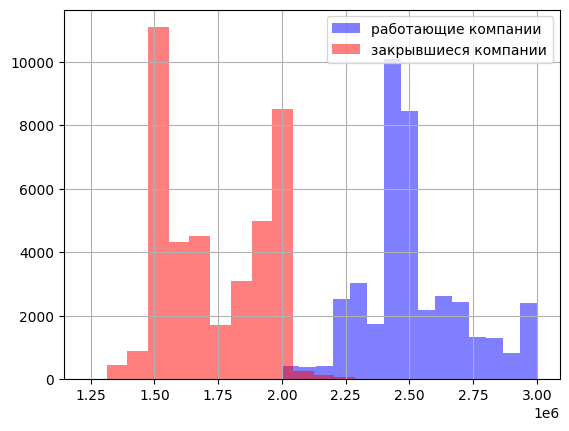

In [33]:
plt.hist(op_list, color = 'blue', alpha=0.5, bins=15, label='работающие компании')
plt.hist(cl_list, color = 'red', alpha=0.5, bins=15, label='закрывшиеся компании')

plt.grid()
plt.legend()
plt.show()


Теперб можно с увереностью сказать, что финансирование является важной характеристикой при определнии статуса компании. Чем ниже финансирование, тем выше шанс что компания закроется.

### Промежуточный результат

* Проведен разведочный анализ данных и выявлены основные зависимости в данных

## Разработка новых синтетических признаков

Сначала добавим признак обнаруженный в тестовом наборе данный - lifetime, с помощью уже подготовленных столбцов данных со временем.
Также я считаю, что важным признаком в этих данных является время прошедшее с последнего финансирования, поэтому добавим этот признак.

In [34]:
train_data['lifetime'] = (pd.to_datetime('2018-01-01') - train_data['founded_at']).dt.days
train_data['time_for_last_round'] = (pd.to_datetime('2018-01-01') - train_data['last_funding_at']).dt.days

test_data['time_for_last_round'] = (pd.to_datetime('2018-01-01') - test_data['last_funding_at']).dt.days

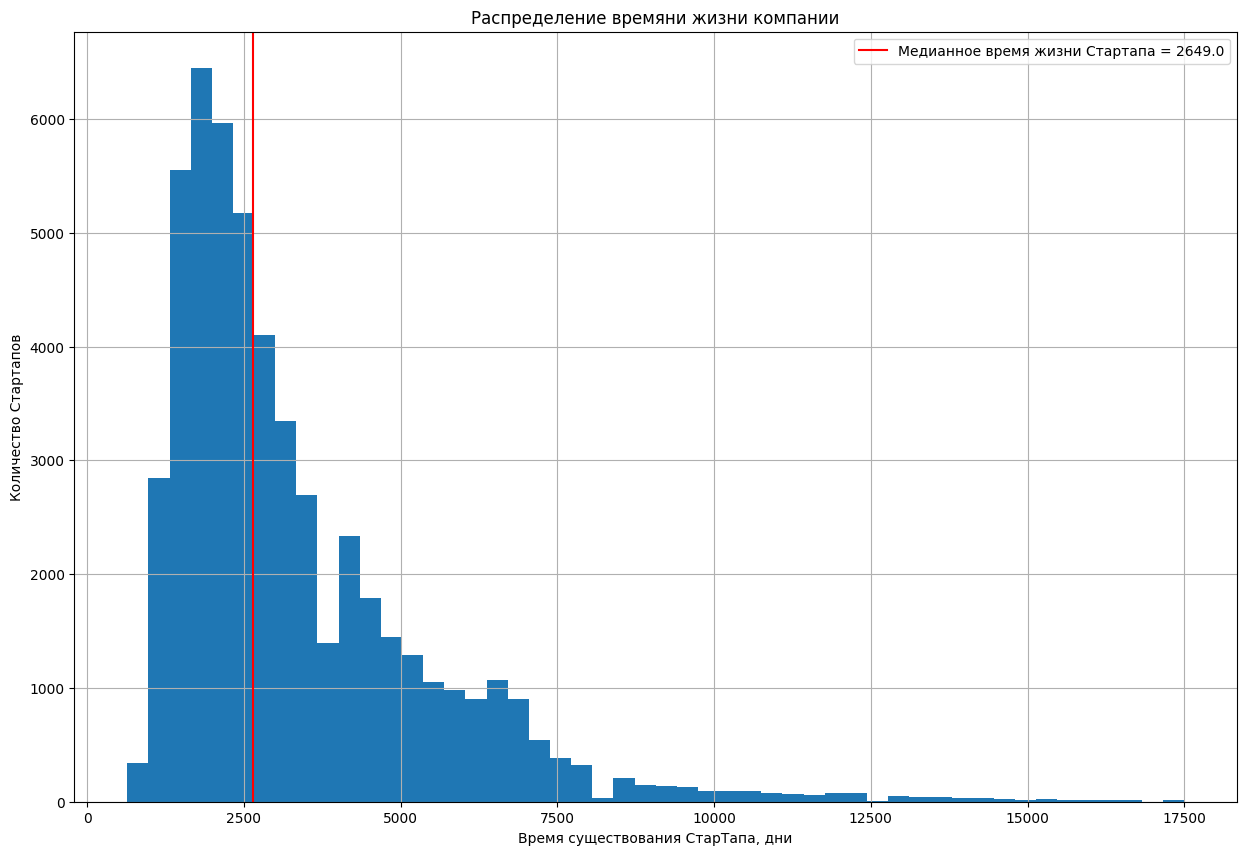

In [35]:
plt.figure(figsize=(15,10))
plt.hist(train_data['lifetime'], bins = 50)
plt.title('Распределение времяни жизни компании')
plt.xlabel('Время существования СтарТапа, дни')
plt.ylabel('Количество Стартапов')
plt.axvline(train_data['lifetime'].median(), label = f'Медианное время жизни Стартапа = {train_data["lifetime"].median()}', color='red')
plt.legend()
plt.grid()
plt.show()

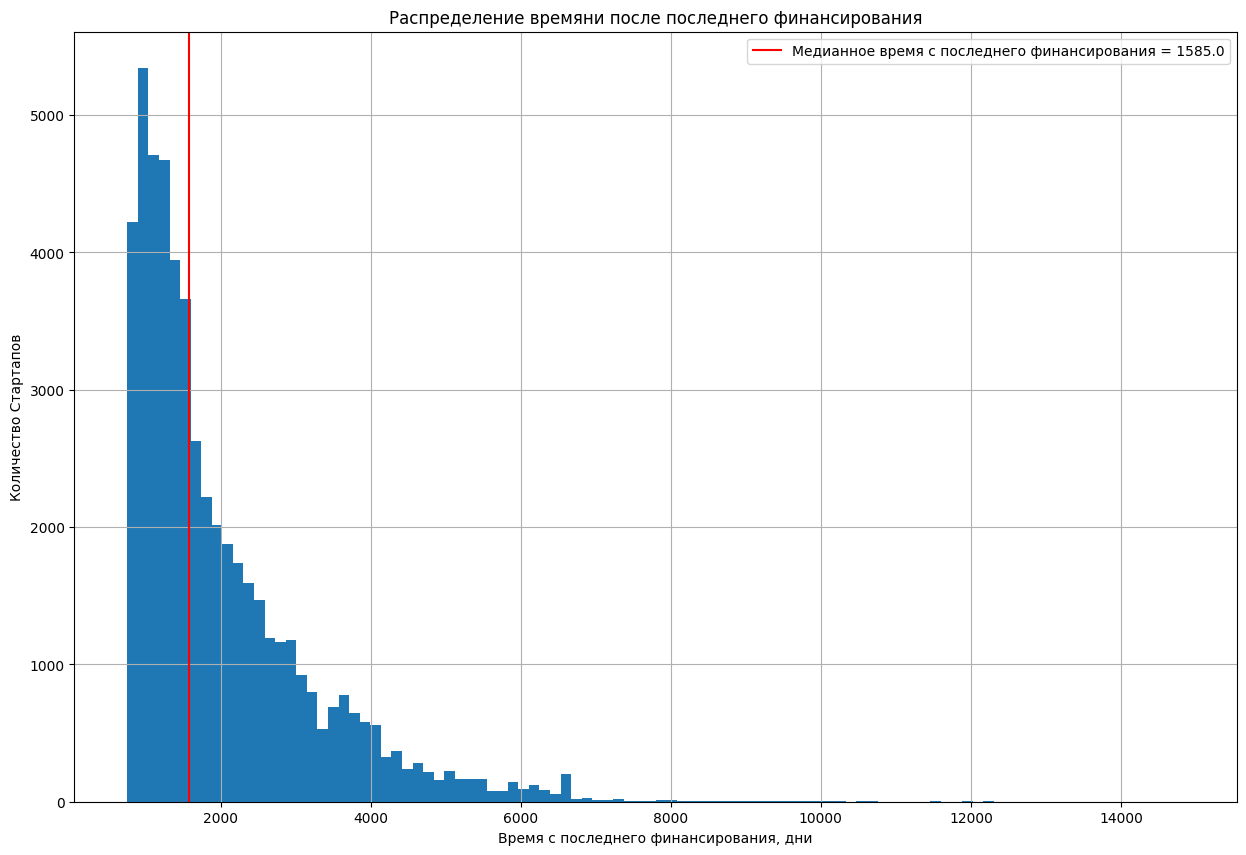

In [36]:
plt.figure(figsize=(15,10))
plt.hist(train_data['time_for_last_round'], bins = 100)
plt.title('Распределение времяни после последнего финансирования')
plt.xlabel('Время с последнего финансирования, дни')
plt.ylabel('Количество Стартапов')
plt.axvline(train_data['time_for_last_round'].median(), label = f'Медианное время с последнего финансирования = {train_data["time_for_last_round"].median()}', color='red')
plt.legend()
plt.grid()
plt.show()

Графики введеных признаков имеют распределение пуассона, посмотрим на эти график, как и в разведочном анализе, через призму целевого признака.

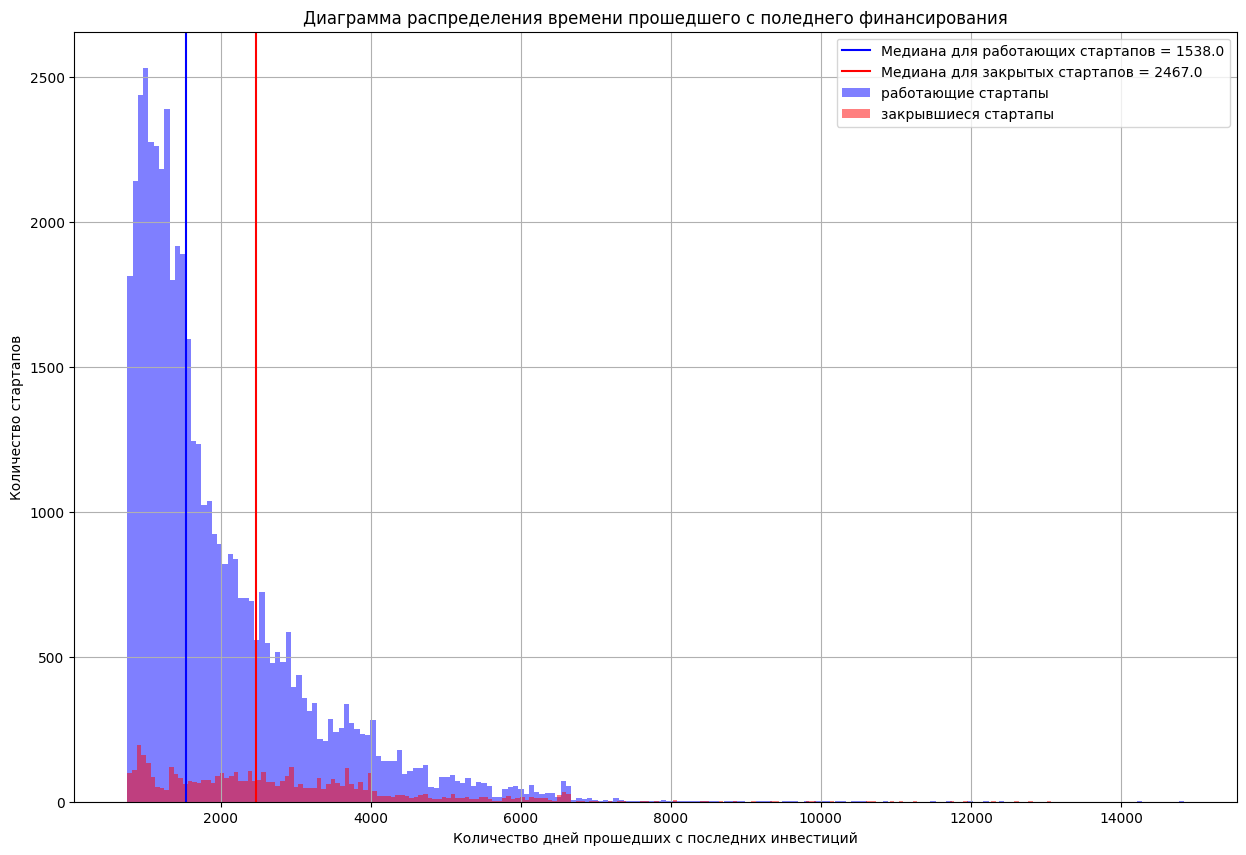

In [37]:
op_data = train_data[train_data['status'] == 'operating']
cl_data = train_data[train_data['status'] == 'closed']

plt.figure(figsize=(15,10))
plt.hist(op_data['time_for_last_round'], bins=200, color='blue', alpha=0.5, label='работающие стартапы')
plt.hist(cl_data['time_for_last_round'], bins=200, color='red', alpha=0.5, label='закрывшиеся стартапы')
plt.grid()
plt.xlabel('Количество дней прошедших с последних инвестиций')
plt.ylabel('Количество стартапов')
plt.title('Диаграмма распределения времени прошедшего с поледнего финансирования')
plt.axvline(op_data['time_for_last_round'].median(), color='blue',
                label=f'Медиана для работающих стартапов = {op_data["time_for_last_round"].median()}')
plt.axvline(cl_data['time_for_last_round'].median(), color='red',
                label=f'Медиана для закрытых стартапов = {cl_data["time_for_last_round"].median()}')

plt.legend()
plt.show()

Видно, что для закрытых стартапов медаина в 2 раза больше, чем для еще работающих. Выдвенем гипотезу о том, что закрывающеюся Стартапы давно не финансируются.

* Нулевая гипотеза - среднее  время с последнего финансирования для работающих компаний такое же как и для закрытых
* Альтернативная гипотеза - среднее  время с последнего финансирования для работающих компаний ниже, чем для закрытых

С помощью бутстрепа создадим выборки средних значений.

In [38]:
bootstrap_samples = 100000

op_list_last_round = []
cl_list_last_round = []

for i in range(bootstrap_samples):
    op_subsample_last_round = op_data['time_for_last_round'].sample(n=1500, replace=True, random_state = state)
    cl_subsample_last_round = cl_data['time_for_last_round'].sample(n=1500, replace=True, random_state = state)
    
    op_list_last_round.append(op_subsample_last_round.median())
    cl_list_last_round.append(cl_subsample_last_round.median())

In [39]:
stat_T, p_value = ttest_ind(op_list_last_round, cl_list_last_round, equal_var=False, alternative = 'less')

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу, среднее время с последнего финансирования для работающих компаний ниже, чем для закрытых')
else:
    print('Не можем отвергнуть нулевую гипотезу, среднее время с последнего финансирования для работающих компаний такое же как и для закрытых')    

Отвергаем нулевую гипотезу, среднее время с последнего финансирования для работающих компаний ниже, чем для закрытых


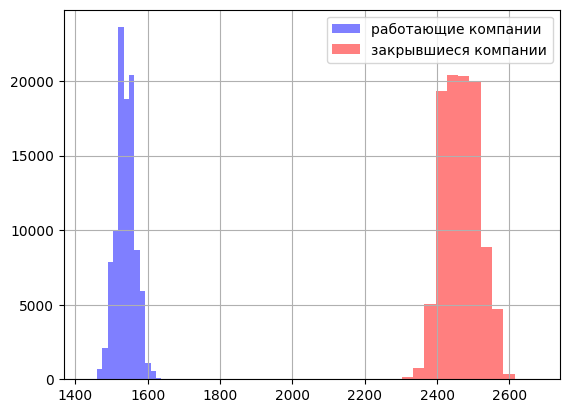

In [40]:
plt.hist(op_list_last_round, color = 'blue', alpha=0.5, bins=15, label='работающие компании')
plt.hist(cl_list_last_round, color = 'red', alpha=0.5, bins=15, label='закрывшиеся компании')
plt.grid()
plt.legend()
plt.show()

По p-value можно сделать вывод о том, что гипотеза верна и работающие компании часто финансируются и время с последнего финансирования ниже, чем для закрытых компаний.

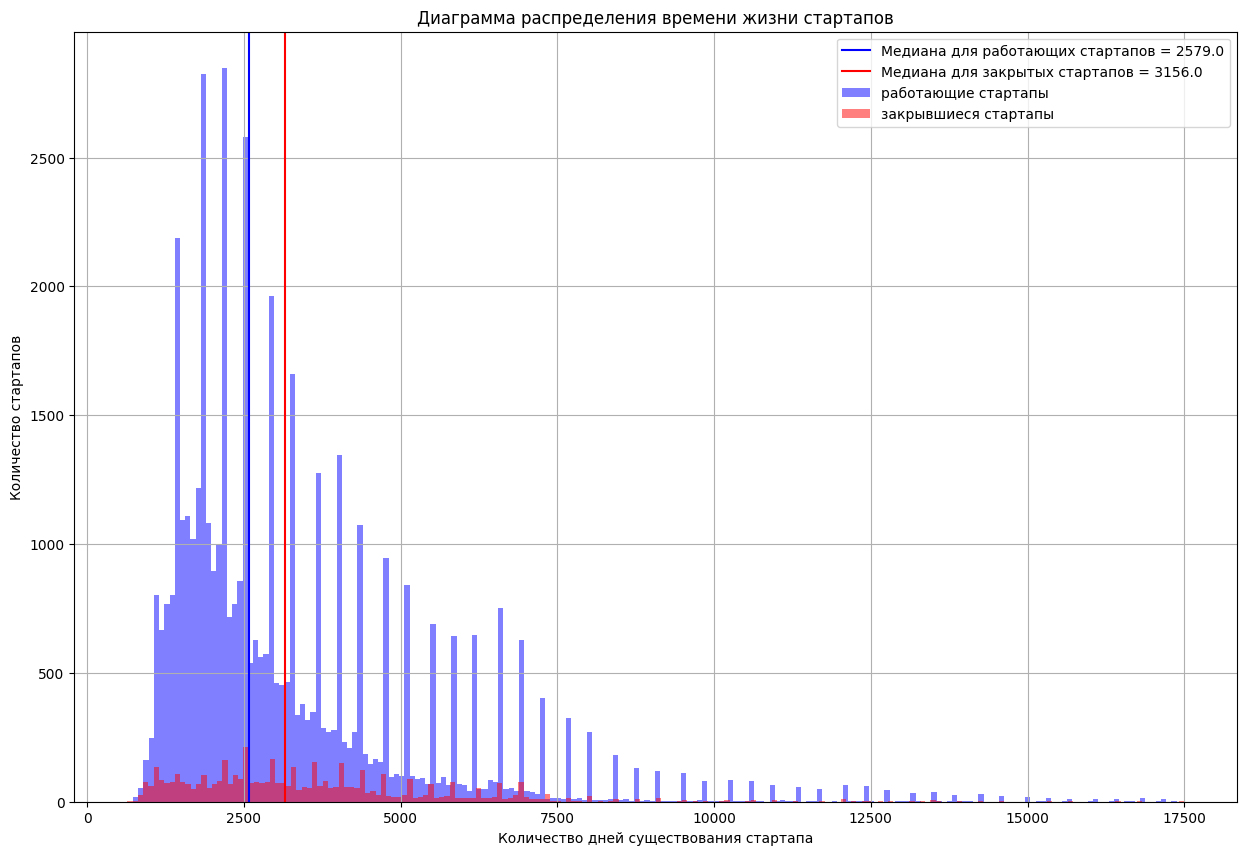

In [41]:
plt.figure(figsize=(15,10))
plt.hist(op_data['lifetime'], bins=200, color='blue', alpha=0.5, label='работающие стартапы')
plt.hist(cl_data['lifetime'], bins=200, color='red', alpha=0.5, label='закрывшиеся стартапы')
plt.grid()
plt.xlabel('Количество дней существования стартапа')
plt.ylabel('Количество стартапов')
plt.title('Диаграмма распределения времени жизни стартапов')
plt.axvline(op_data['lifetime'].median(), color='blue',
                label=f'Медиана для работающих стартапов = {op_data["lifetime"].median()}')
plt.axvline(cl_data['lifetime'].median(), color='red',
                label=f'Медиана для закрытых стартапов = {cl_data["lifetime"].median()}')

plt.legend()
plt.show()

Ситуация аналогичная прошлой гистограмме, поэтому выдвенем похожую гипотезу. Гипотеза будет заключаться в том, что в основном еще работаюшие компании - это молодые компании, в связи с эти поставим следующие предположения:
* Нулевая гипотеза - среднее время жизни работающих компаний и закрывшихся одинаково
* Альтернативная гипотеза - среднее время жизни работающих компаний меньше, чем время жизни закрывшихся компаний

In [42]:
op_list_lifetime = []
cl_list_lifetime = []

for i in range(bootstrap_samples):
    op_subsample_lifetime = op_data['lifetime'].sample(n=1500, replace=True, random_state = state)
    cl_subsample_lifetime = cl_data['lifetime'].sample(n=1500, replace=True, random_state = state)
    
    op_list_lifetime.append(op_subsample_lifetime.median())
    cl_list_lifetime.append(cl_subsample_lifetime.median())

In [43]:
stat_T, p_value = ttest_ind(op_list_lifetime, cl_list_lifetime, equal_var=False, alternative = 'less')

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу, среднее время жизни работающих компаний меньше, чем время жизни закрывшихся компаний')
else:
    print('Не можем отвергунть нулевую гипотезу, среднее время жизни работающих компаний и закрывшихся одинаково')    

Отвергаем нулевую гипотезу, среднее время жизни работающих компаний меньше, чем время жизни закрывшихся компаний


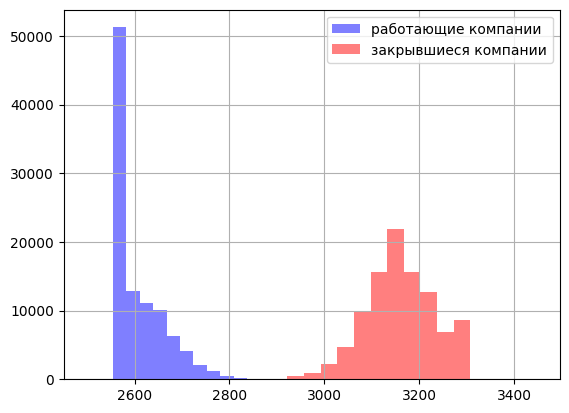

In [44]:
plt.hist(op_list_lifetime, color = 'blue', alpha=0.5, bins=15, label='работающие компании')
plt.hist(cl_list_lifetime, color = 'red', alpha=0.5, bins=15, label='закрывшиеся компании')
plt.grid()
plt.legend()
plt.show()

category_list содежит информацию о том, чем компания занимается, но в форме которую тяжело анализировать - из 53 тысяч значений 22 тысячи уникальных, что усложнят процесс анализа данных и обучения модели. Чтобы упростить данный столбец, выделем в нем основные категории и слова, которые могут отнести данный стартап к этой категории. К каждому стартапу по его области работы будет присвоена категория, но так как встречаются стартапы многопрофильные, сдедаем так, чтобы у стартапов могло быть несколько категорий.

In [45]:
it = ['Analytics', 'Software', 'Apps', 'Big Data', 'Games', 'Game']
medicine =['Medical', 'Biotechnology', 'Pharmaceuticals', 'Health', 'Hospitality', 'Hospitals']
food = ['Restaurants', 'Food']
factory = ['Semiconductors', 'Technology', 'Manufacturing', 'Nanotechnology', 'Electronics', 'Industry', 'Industrial', 'Infrastructure']
finance = ['Finance', 'E-Commerce', 'Marketing', 'Payments', 'Commerce', 'Financial', 'B2B']
media = ['Media', 'Messaging', 'Advertising', 'Video', 'video', 'Education', 'education', 'News', 'news', 'Publishing', 'Telecommun']
sport = ['sport', 'Sport', 'Fitness']
design = ['Fashion', 'Fashion', 'Music', 'Art', 'Design', 'Beauty']
services = ['online', 'Online', 'Service', 'Curated Web', 'Web Hosting', 'Marketplaces', 'Mobile', 'Web', 'Shopping', 'SaaS', 'Internet']
travel = ['Travel', 'travel']
security = ['Security', 'security']

cat_list = {'it': it, 'medicine': medicine, 'food': food,
           'factory': factory, 'finance': finance, 'media': media,
           'sport': sport, 'design': design, 'services': services,
          'travel': travel, 'security': security}
key = cat_list.keys()

def categorizator3000(row):
    cat_return = [0]*11 + [1]
    i = 0
    k = 0
    
    for one_key in key: 
        for one in cat_list[one_key]:
            try:
                if  (one in row):
                    cat_return[k] = 1
                    i += 1
                    break
            except:
                pass
        k = k + 1
    
    if i > 0:
        cat_return[-1] = 0
    
    return cat_return

data = train_data['category_list'].apply(categorizator3000).tolist()
data_for_test = test_data['category_list'].apply(categorizator3000).tolist()

l = 0 
for one_key in key:
    train_data[one_key] = [subdata[l] for subdata in data]
    test_data[one_key] = [subdata[l] for subdata in data_for_test]
    l += 1
train_data['other'] = [subdata[-1] for subdata in data]
test_data['other'] = [subdata[-1] for subdata in data_for_test]


### Промежуточные выводы

* Введены два новых признака - lifetime - время жизни стартапа, time_for_last_round - время с последнего финансирования
* category_list переведен в новые столбцы для более простого анализа и обучения моделей.

## Корреляционный анализ

Проведем корреляционный анализ, в виду большого количества категориальных признаков применять метод corr() будет не корректно, поэтому построим phik_matrix(), предварительно исключив 'name', closed_at(не несет практического смысла), 'founded_at', 'first_funding_at', 'last_funding_at', 'category_list'(Преобразованы в другие признаки, которые  будут и так в phik_matrix).

In [46]:
interval_cols = ['funding_total_usd', 'funding_rounds', 'lifetime', 'time_for_last_round']

matrix = train_data.drop(['name', 'founded_at', 'first_funding_at',
                 'last_funding_at', 'closed_at', 'category_list'],
                axis=1).phik_matrix(interval_cols = interval_cols).style.background_gradient(cmap="RdYlGn")
matrix

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable city is large: 4477. Are you sure this is not an interval variable? Analysis for pairs of variables including city can be slow.
  warnings.warn(
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable region is large: 1036. Are you sure this is not an interval variable? Analysis for pairs of variables including region can be slow.
  warnings.warn(


,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,lifetime,time_for_last_round,it,medicine,food,factory,finance,media,sport,design,services,travel,security,other
funding_total_usd,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214304,0.114424,0.063243,0.003678,0.000000,0.000000,0.006560,0.009192,0.000000,0.020911,0.013989,0.004492,0.000000,0.000000,0.000000
status,0.000000,1.000000,0.124833,0.114905,0.131156,0.039585,0.098707,0.103090,0.244593,0.062553,0.083369,0.016885,0.032685,0.038659,0.004503,0.004439,0.012104,0.043296,0.000000,0.026413,0.120362
country_code,0.000000,0.124833,1.000000,0.993440,1.000000,0.999994,0.000000,0.203260,0.103723,0.102209,0.157723,0.064358,0.054924,0.135571,0.068591,0.052164,0.070434,0.117060,0.118974,0.050916,0.083628
state_code,0.000000,0.114905,0.993440,1.000000,0.999927,0.999991,0.000000,0.277230,0.063564,0.112703,0.239520,0.046064,0.098032,0.153114,0.151935,0.058426,0.109002,0.186019,0.104831,0.082974,0.122774
region,0.000000,0.131156,1.000000,0.999927,1.000000,1.000000,0.063840,0.357789,0.036115,0.163015,0.293108,0.023318,0.122581,0.199760,0.170288,0.082683,0.148397,0.217065,0.156639,0.042902,0.182555
city,0.000000,0.039585,0.999994,0.999991,1.000000,1.000000,0.000000,0.655768,0.446861,0.149282,0.404253,0.220321,0.244657,0.138895,0.092777,0.179894,0.000000,0.205746,0.000000,0.000000,0.290665
funding_rounds,0.214304,0.098707,0.000000,0.000000,0.063840,0.000000,1.000000,0.215760,0.148506,0.089964,0.111484,0.004849,0.040213,0.044964,0.028117,0.016699,0.021510,0.034783,0.006746,0.042640,0.162347
lifetime,0.114424,0.103090,0.203260,0.277230,0.357789,0.655768,0.215760,1.000000,0.692071,0.055957,0.111230,0.062709,0.058312,0.136823,0.125507,0.073358,0.087665,0.159500,0.052607,0.054701,0.122131
time_for_last_round,0.063243,0.244593,0.103723,0.063564,0.036115,0.446861,0.148506,0.692071,1.000000,0.060548,0.063836,0.047962,0.075440,0.107992,0.055356,0.051388,0.046408,0.064151,0.023734,0.027197,0.147211
it,0.003678,0.062553,0.102209,0.112703,0.163015,0.149282,0.089964,0.055957,0.060548,1.000000,0.324789,0.055563,0.127654,0.102708,0.043741,0.047807,0.065319,0.004673,0.073275,0.000000,0.360024


Корреляция в 1 между столбцами с геоданными, нормально ,тк логично что Лондон будет находится в Великобритании, а не в России.
Смотря на 'status', можно заметить, что данный признак сильно коррелирует с 'time_for_last_round', 'country_code', 'region' и 'other'.

### Промежуточные выводы

* Мультиколинеарность среди признаков не обнаружена
* 'status' - сильно коррелирует с 'time_for_last_round', 'country_code', 'region' и 'other'

## Отбор обучающих признаков

Из проведенных t-test'ов можно сказать, что одназначно 'time_for_last_round', 'lifetime', 'funding_total_usd' будут в обучающей выборке, также из корреляционного анализа видно, что признаки  'funding_rounds', 'country_code', 'region' и 'other' играют важную роль. Добавим к 'other' и остальные признаки категорий.

In [47]:
TEST_SIZE = 0.1

def coder(row):
    if row == 'operating':
        return 1
    else:
        return 0

X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(['name', 'founded_at', 'first_funding_at',
                 'last_funding_at', 'closed_at', 'category_list', 'city', 'state_code', 'status'],
                axis=1),
    train_data['status'],
    random_state = RANDOM_STATE,
    test_size = TEST_SIZE)

y_train = y_train.apply(coder)
y_test = y_test.apply(coder)

### Промежуточные выводы

* Произведен отбор обучающих признаков, в обучающей выборке буду присутствовать - 'time_for_last_round', 'lifetime', 'funding_total_usd', 'funding_rounds', 'country_code', 'region', 'other', 'it', 'medicine', 'food', 'factory', 'finance', 'media','sport', 'design', 'services','travel', 'security'

## Обучение 

Подбор лучшей модели с гиперпараметрами будем производить с помощью Pipeline, в подборе будут участвовать следующие модели:

* RandomForestClassifier()
* KNeighborsClassifier()
* CatBoostClassifier()
* SVC()

А данные будем подготавливать с помощью ColumnTransformer: 

* 'funding_rounds', 'region', 'country_code' - будем кодировать OrdinalEncoder'ом, в виду множества уникальных значений
* 'funding_total_usd', 'time_for_last_round', 'lifetime' - для численных данных будет подбираться оптимальный из следующих [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()] 
* оставшиеся признаки уже закодированы по образу OneHotEncoder()



In [48]:
train_num = ['funding_total_usd', 'time_for_last_round', 'lifetime']
train_ord = ['funding_rounds', 'region', 'country_code']


data_prep = ColumnTransformer(
    [
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), train_ord),
        ('num', StandardScaler(), train_num)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

pipe_final= Pipeline(
    [
        ('preprocessor', data_prep),
        ('models', RandomForestClassifier(random_state=RANDOM_STATE))
    ]
)

In [49]:
param_grid = [
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': range(80, 120),
        'models__min_samples_split': range(2, 5),
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]   
    },

    {
       'models': [CatBoostClassifier()],
       'models__iterations': range(200, 1000, 50),
        'models__learning_rate': [i*0.1 for i in range(1, 10)],
        'models__depth': range(2, 10),
       'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]  
    },
        {'models': [SVC(random_state=RANDOM_STATE, kernel='linear',probability=True)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]  
    }    
]

grid = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring = 'f1',
    n_jobs=-1,
    error_score = 'raise',
    random_state=RANDOM_STATE
)


In [50]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('ord',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['funding_rounds',
                                                                                'region',
                                                                                'country_code']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['funding_total_usd',
                                                                                'time_for_las...
                                                                   0.30000000000000004,
                                                                   0.4, 0.5,
                                                                   0.6000000000000001,
                                                                   0.7000000000000001,
                                                                   0.8, 0.9],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               MaxAbsScaler()]},
                                        {'models': [SVC(kernel='linear',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               MaxAbsScaler()]}],
                   random_state=42, scoring='f1')

Модель обучилась, посмотрим на результаты

In [51]:
pd.DataFrame(grid.cv_results_)[['rank_test_score', 'mean_test_score','params']].sort_values('rank_test_score')

,rank_test_score,mean_test_score,params
1,1,0.950901,"{'preprocessor__num': StandardScaler(), 'model..."
6,1,0.950901,"{'preprocessor__num': RobustScaler(), 'models_..."
7,3,0.950124,"{'preprocessor__num': RobustScaler(), 'models_..."
2,4,0.948338,"{'preprocessor__num': RobustScaler(), 'models_..."
8,5,0.947461,"{'preprocessor__num': RobustScaler(), 'models_..."
3,6,0.946049,"{'preprocessor__num': MaxAbsScaler(), 'models_..."
0,7,0.943930,"{'preprocessor__num': RobustScaler(), 'models_..."
5,8,0.943827,"{'preprocessor__num': MinMaxScaler(), 'models_..."
4,9,0.942511,"{'preprocessor__num': RobustScaler(), 'models_..."
9,10,0.939433,"{'preprocessor__num': RobustScaler(), 'models_..."


Лидирующие позиции занимает CatBoostClassifier и RandomForestClassifier с метрикой выше 0.9 - довольно хороший результат, посмотрим как на тестовой выборке покажет себя лучшая модель.

In [52]:
features = grid.best_estimator_['preprocessor'].fit_transform(X_test)

probabilities = grid.best_estimator_['models'].predict(features)
print(f'f1-score - {f1_score(y_test, probabilities)}')

f1-score - 0.9507541704125462


Отличный результат - модель не переобучилась и показывает отличные показатели метрики f1

### Промежуточный результат

* Подобрана наилучшая модель для нашей задачи с значением метрики 0.95, Наилучшая модель - RandomForestClassifier с парметрами {'preprocessor__num': RobustScaler(), 'models__n_estimators': 116, 'models__min_samples_split': 4, 'models__max_features': 2, 'models__max_depth': 2}

##  Интерпритация модели

Имея отлично обученную модель, посмотрим на что в основном опирается модель при выдаче результатов, сделаем это с помощью техники SHAP и одноименной библиотеки.

In [53]:
X_train_inter = grid.best_estimator_['preprocessor'].fit_transform(X_train)
X_train_inter = pd.DataFrame(X_train_inter, columns = grid.best_estimator_['preprocessor'].get_feature_names_out())

background_sample = shap.kmeans(X_train_inter.values, 100)
explainer = shap.KernelExplainer(grid.best_estimator_['models'].predict_proba, background_sample)

X_test_inter = grid.best_estimator_['preprocessor'].transform(X_test)
X_test_inter = pd.DataFrame(X_test_inter, columns = grid.best_estimator_['preprocessor'].get_feature_names_out())

shap_values = explainer(X_test_inter)

  0%|          | 0/5252 [00:00<?, ?it/s]

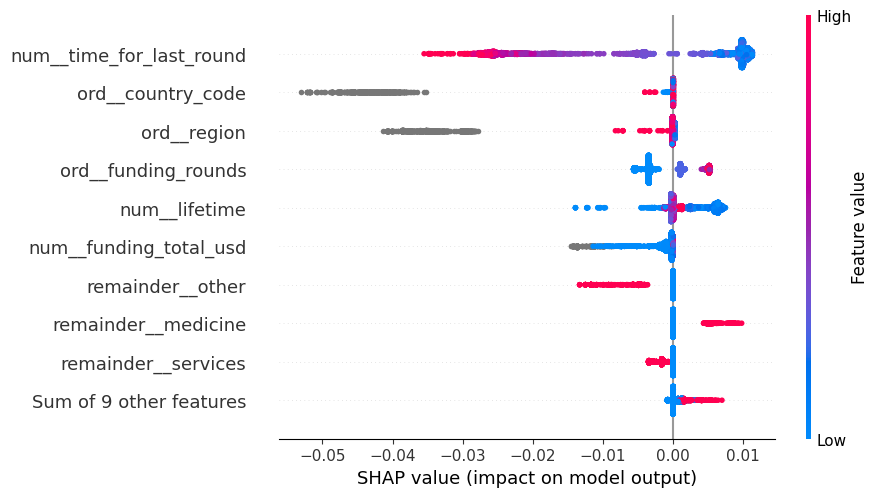

In [54]:
shap.plots.beeswarm(shap_values[:, :, 1]) 

Как видно на диаграмме, наиболее важными признаками в обучении были - время с последнего финансирования, страна, регион, количество раундов финансирования и время существования стартапа. Посмотрим более детально на процесс присвоения класса моделью.

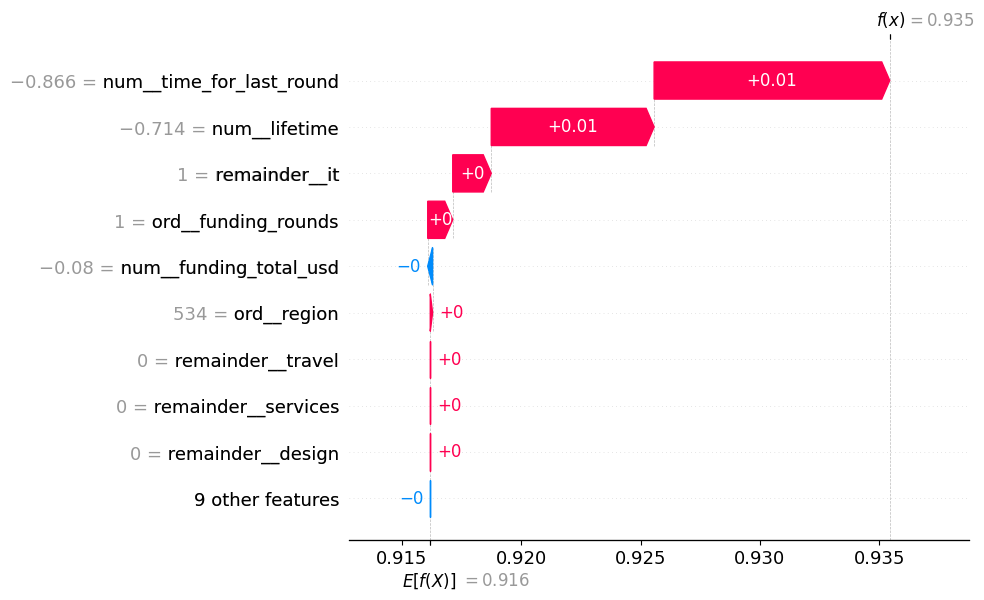

In [55]:
shap.plots.waterfall(shap_values[:, : , 1][0])

Для 0 объекта видно, что наиболее весомыми признаками были time_for_last_round, lifetime, а также в топ 5 вошло категория it, количество раундов финансирования и общее финансировнаие.

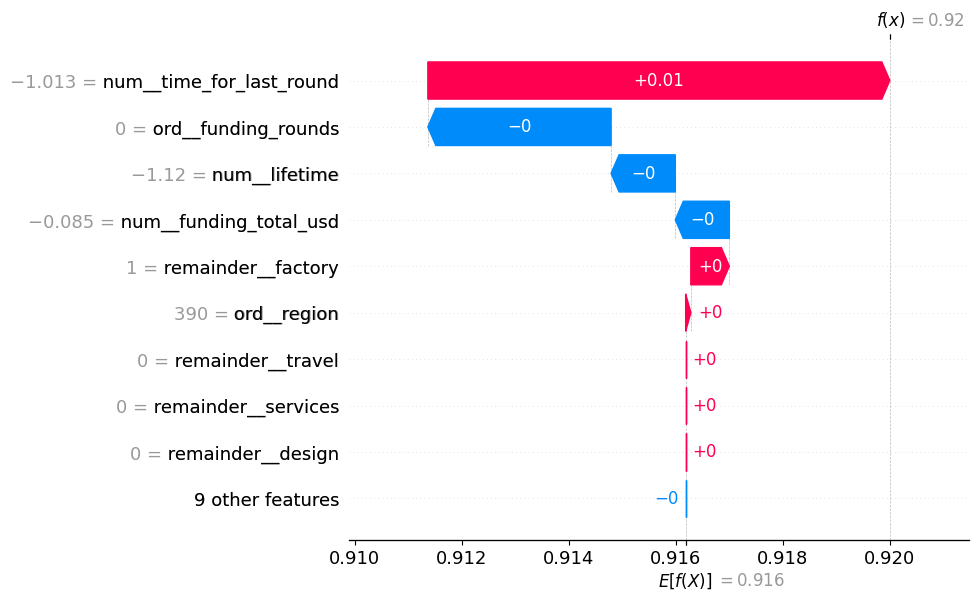

In [56]:
shap.plots.waterfall(shap_values[:, : , 1][100])

У 100 Стартапа все очень похоже -  в топ 5 опять time_for_last_round, lifetime, funding_total_usd, funding_rounds.

### Промежуточные выводы

* Проведен SHAP анализ модели - выявлены наиболее важные признаки для модели: time_for_last_round, lifetime, funding_total_usd, funding_rounds

## Выводы

* Загружены основные библиотеки
* Загружены таблицы с данными и проведено первичное с ними знакомство
* Временные данные приведены к нужному типу
* Обработана часть пропусков в суммаром финансировании
* Проведен разведочный анализ данных и выявлены основные зависимости в данных
* Введены два новых признака - lifetime - время жизни стартапа, time_for_last_round - время с последнего финансирования
* category_list переведен в новые столбцы для более простого анализа и обучения моделей.
* Мультиколинеарность среди признаков не обнаружена
* 'status' - сильно коррелирует с 'time_for_last_round', 'country_code', 'region' и 'other'
* Произведен отбор обучающих признаков, в обучающей выборке буду присутствовать - 'time_for_last_round', 'lifetime', 'funding_total_usd', 'funding_rounds', 'country_code', 'region', 'other', 'it', 'medicine', 'food', 'factory', 'finance', 'media','sport', 'design', 'services','travel', 'security'
* Подобрана наилучшая модель для нашей задачи с значением метрики 0.95, Наилучшая модель - RandomForestClassifier с парметрами {'preprocessor__num': RobustScaler(), 'models__n_estimators': 116, 'models__min_samples_split': 4, 'models__max_features': 2, 'models__max_depth': 2}
* Проведен SHAP анализ модели - выявлены наиболее важные признаки для модели: time_for_last_round, lifetime, funding_total_usd, funding_rounds